## Iris Dataset course

In [6]:
# Import the necessary library to load the Iris dataset from scikit-learn
from sklearn.datasets import load_iris
import seaborn as sns

# Import pandas for data manipulation
import pandas as pd

# Load the Iris dataset into a variable. This function returns an object containing the data, the names of the features, and additional information.
iris = load_iris()

# Create a DataFrame from the Iris dataset's features.
# iris.data contains the data, and iris.feature_names contains the column names for the DataFrame.
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Add a new column to the DataFrame for the species of each sample.
# iris.target contains the numerical labels (0, 1, 2) corresponding to the species of each observation.
# iris.target_names contains the actual species names corresponding to these numerical labels.
# pd.Categorical.from_codes() converts numerical categories (iris.target) into a categorical data type using the mapping provided by iris.target_names.
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Display the first few rows of the DataFrame to check the structure and the data.
# This is often used to verify that the DataFrame has been constructed correctly.
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:

df.info() 
df.describe()

In [14]:
import pandas as pd

# If you downloaded the file from UCI and it doesn't have a header, specify the column names
url = 'iris.csv'  # Change this to the path of your downloaded file
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
iris_data = pd.read_csv(url, header=None, names=column_names)

# If you downloaded the file from GitHub or another source that includes a header, you can load it directly
# url = 'path/to/your/downloaded/iris.csv'
# iris_data = pd.read_csv(url)

# Display the first few rows of the dataframe
print(iris_data.head())

   sepal_length  sepal_width  petal_length  petal_width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


## Day 3 - Basics of data manipulation

In [7]:
species_counts = df['species'].value_counts()
setosa_count = species_counts['setosa']

print("Number of setosa samples: ", setosa_count)
print("Total species ",  species_counts)

Number of setosa samples:  50
Total species  species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


In [8]:
setosa_df = df[df.species == 'setosa'] 
sepal_df = df.loc[:, ['sepal length (cm)', 'sepal width (cm)']]

print(sepal_df)

     sepal length (cm)  sepal width (cm)
0                  5.1               3.5
1                  4.9               3.0
2                  4.7               3.2
3                  4.6               3.1
4                  5.0               3.6
..                 ...               ...
145                6.7               3.0
146                6.3               2.5
147                6.5               3.0
148                6.2               3.4
149                5.9               3.0

[150 rows x 2 columns]


In [9]:
sorted_df = df.sort_values(by=['petal length (cm)', 'petal width (cm)'], ascending=[True, False])

In [10]:

df.describe() 
df.groupby('species').agg(['min', 'max', 'mean'])

C:\Users\manny\AppData\Local\Temp\ipykernel_51300\3534916568.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('species').agg(['min', 'max', 'mean'])


sepal length (cm)             sepal width (cm)              \
                         min  max   mean              min  max   mean   
species                                                                 
setosa                   4.3  5.8  5.006              2.3  4.4  3.428   
versicolor               4.9  7.0  5.936              2.0  3.4  2.770   
virginica                4.9  7.9  6.588              2.2  3.8  2.974   

           petal length (cm)             petal width (cm)              
                         min  max   mean              min  max   mean  
species                                                                
setosa                   1.0  1.9  1.462              0.1  0.6  0.246  
versicolor               3.0  5.1  4.260              1.0  1.8  1.326  
virginica                4.5  6.9  5.552              1.4  2.5  2.026

## Data Visualizations 

<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

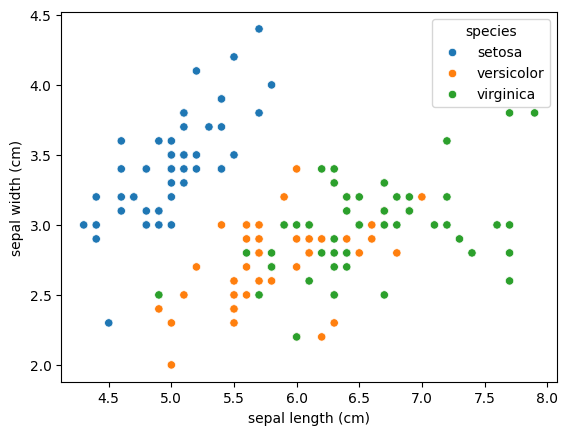

In [11]:
import seaborn as sns
sns.scatterplot(data=df, x='sepal length (cm)', y='sepal width (cm)', hue='species')


<Axes: xlabel='petal length (cm)', ylabel='Count'>

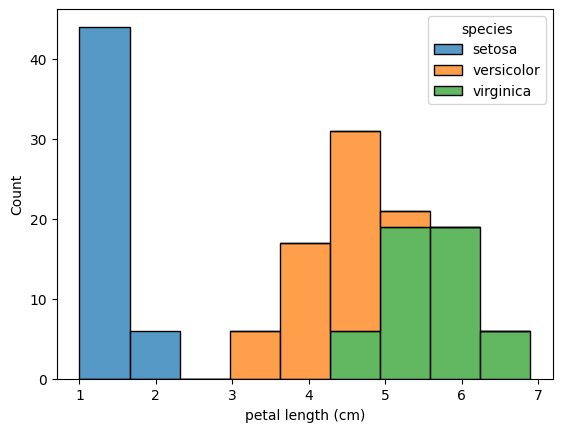

In [12]:
sns.histplot(data=df, x='petal length (cm)', hue='species', multiple='stack')


<Axes: xlabel='species', ylabel='petal width (cm)'>

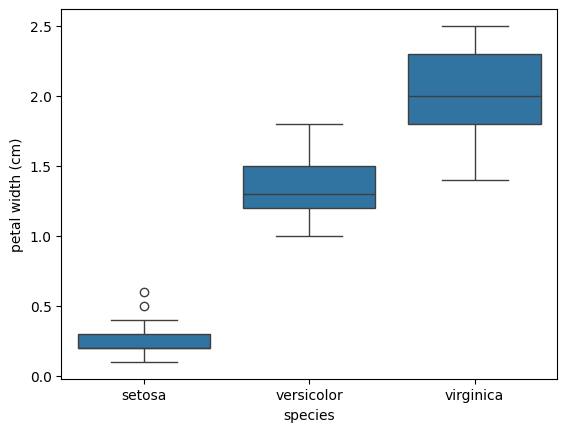

In [13]:
sns.boxplot(data=df, x='species', y='petal width (cm)')
